# Проект. Исследование стартапов

## Введение

Финансовая компания, работающая с венчурными инвестициями, хочет понять закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний. Для этого необходимо провести исследование на исторических данных. Вы поработаете с информацией о компаниях, объёмах и типах привлечённых инвестиций, а также с дополнительной статистикой по возвратам средств.

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `///`. Внутри архива один файл — `///`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `///`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.



### 1.1. Вывод общей информации

Загрузите необходимые для работы библиотеки.

Совет: если вы неоднократно используете какой-либо код, вынесите его в начало проекта в виде функций.

In [1]:
# Импортируем библиотеки
import numpy as np
import re
import pandas as pd 
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# # Загружаем библиотеку для расчёта коэффициента корреляции phi_k
# !pip install phik
# from phik import phik_matrix

Загрузите все данные по проекту.



In [2]:
cb_investments = pd.read_csv("///", sep=';', low_memory=False)

In [3]:
cb_returns = pd.read_csv("///")#, sep=';', low_memory=False)

Выведите информацию, которая необходима для принятия решений о предобработке.

In [4]:
cb_investments.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [5]:
cb_investments.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
cb_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


In [7]:
cb_returns.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Объем данных в датасете "cb_investments" составляет чуть менее пятидесяти тысяч строк. Названия столбцов представлены в виде snake-case. В некоторых столбцах присутствуют пропуски.

Данные в датасете "cb_returns", в свою очередь, представлены в очень незначительных масштабах, без пропусков.

Сделайте вывод о полученных данных: каков их объём, соответствуют ли данные описанию, есть ли пропущенные значения, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

### 1.2. Предобработка данных

Проверьте названия столбцов в датасетах: все ли они точно отражают содержимое данных и оформлены в удобном для работы стиле. При необходимости приведите их к единому аккуратному стилю.

In [8]:
#Cоздаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
temp = cb_investments.copy() 
len(temp)

54294

In [9]:
cb_investments.columns = cb_investments.columns.str.replace(' ', '')
#На всякий случай имеет смысл повторить эту операцию с другим датасетом, так как невидымые пробелы могуть быть в конце названий.
cb_returns.columns = cb_returns.columns.str.replace(' ', '')

Уберите в столбце `funding_total_usd` выделение разрядов и приведите его к числовому типу.

In [10]:
cb_investments['funding_total_usd'] = cb_investments['funding_total_usd'].str.replace(' ', '')
cb_investments['funding_total_usd'] = cb_investments['funding_total_usd'].str.replace(',', '')
cb_investments['funding_total_usd'] = cb_investments['funding_total_usd'].replace('-', np.nan)
cb_investments['funding_total_usd'] = cb_investments['funding_total_usd'].astype(float)


Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

Комментарий студента V4: добавил преобразование типа данных в столбце mid_funding_at

In [11]:
cb_investments['first_funding_at'] = pd.to_datetime(cb_investments['first_funding_at'], format='%Y-%m-%d', errors='coerce') 
cb_investments['last_funding_at'] = pd.to_datetime(cb_investments['last_funding_at'], format='%Y-%m-%d', errors='coerce')
cb_investments['mid_funding_at'] = pd.to_datetime(cb_investments['mid_funding_at'], format='%Y-%m-%d', errors='coerce')

В датасете `cb_returns` сделайте столбец `year` индексом всего датасета, если не делали это при загрузке.

In [12]:
cb_returns = cb_returns.set_index('year')


Обработайте текстовые данные, если это необходимо. Пропуски в текстовых столбцах заполните заглушками там, где это понадобится.

In [13]:
# Общее количество строк до предобработки
initial_rows = len(cb_investments)
print(initial_rows)

54294


In [14]:
cb_investments = cb_investments.dropna(subset=['name', 'status', 'market'])


Обработайте полные дубликаты в данных и пропуски в `funding_total_usd`. избавьтесь от тех строк, которые не несут какой-либо информации либо не содержат данных о финансировании.

In [15]:
# Удаляем пробелы в значениях столбца 'market'
cb_investments['market'] = cb_investments['market'].str.strip()




In [16]:
# Проверка наличия дубликатов
duplicates = cb_investments[cb_investments.duplicated()]



# Удаление дубликатов
cb_investments = cb_investments.drop_duplicates()


In [17]:
# Удаляем строки с пропусками в столбце funding_total_usd
cb_investments = cb_investments.dropna(subset=['funding_total_usd'])




In [18]:
cb_investments['funding_total_usd'] = cb_investments['funding_total_usd'].fillna(
    cb_investments[['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding',
       'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F',
       'round_G', 'round_H']].sum(axis=1)
)


In [20]:
#На всякий случай проверяем, остались ли пропуски в данном столбце после проведенных операций
missing_rows = cb_investments[cb_investments['funding_total_usd'].isna()]
print(missing_rows)


Empty DataFrame
Columns: [name, homepage_url, category_list, market, funding_total_usd, status, country_code, state_code, region, city, funding_rounds, participants, founded_at, founded_month, founded_quarter, founded_year, first_funding_at, mid_funding_at, last_funding_at, seed, venture, equity_crowdfunding, undisclosed, convertible_note, debt_financing, angel, grant, private_equity, post_ipo_equity, post_ipo_debt, secondary_market, product_crowdfunding, round_A, round_B, round_C, round_D, round_E, round_F, round_G, round_H]
Index: []

[0 rows x 40 columns]


In [21]:
average_value = cb_investments['funding_total_usd'].mean()
print(average_value)


16307770.140166529


Для аналитиков и венчурных фондов, работающих на рынке стартапов, суммы классифицируются следующим образом:
Несущественные (Negligible): Инвестиции в диапазоне от нескольких сотен до десятков тысяч долларов (например, $1 000, $5 000, $25 000) обычно считаются личными средствами основателей, средствами "друзей и семьи" (friends & family) или микрогрантами. Они редко фигурируют в агрегированном рыночном анализе, который фокусируется на трендах венчурного капитала.
Значимые для ранней стадии (Seed Stage): Профессиональные инвесторы начинают обращать внимание на раунды финансирования Pre-Seed и Seed с суммами от $50 000 до $250 000 (минимальный порог для некоторых акселераторов), а типичные средние Seed-раунды составляют от $500 000 до $3 миллионов. Именно эти суммы являются предметом обсуждения в отраслевой аналитике.
Крупные раунды (Series A и далее): Инвестиции на стадиях A, B и C исчисляются уже миллионами и десятками миллионов долларов ($5 млн – $50 млн и выше), и безусловно являются основой любого рыночного обзора. 
Таким образом, если речь идет о серьезном анализе рынка стартапов, оперирующем стандартными метриками венчурного финансирования, сумма ниже $50 000 может быть приведена как пример несущественного, "гаражного" финансирования, не влияющего на общие рыночные тенденции.


Заполните пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения вместо пропусков возьмите приблизительно середину интервала между этими двумя датами.

Оцените размер оставшихся пропусков в столбце.

In [22]:
# Вычисляем среднее значение между first_funding_at и last_funding_at
cb_investments['mid_funding_at'] = cb_investments.apply(lambda row: (row['first_funding_at'] + (row['last_funding_at'] - row['first_funding_at']) / 2), axis=1)

# Заполняем пропуски в mid_funding_at вычисленными значениями
cb_investments['mid_funding_at'].fillna(cb_investments['mid_funding_at'], inplace=True)



In [23]:
missing_values_count = cb_investments['mid_funding_at'].isna().sum()
print(missing_values_count)


2


Оцените полноту данных и сделайте предварительный вывод о том, достаточно ли данных для решения задач проекта. Какой процент данных был отброшен?

In [24]:
a, b = len(temp), len(cb_investments)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 54294 
 Осталось строк в датасете после обработки 37591 
 Удалено строк в датасете после обработки 16703 
 Процент потерь 30.76


В процессе предобработки было отброшено 30.76% данных, которые являлись дубликатами или не содержали ценную для анализа информацию. Оставшихся данных, учитывая их количество, релевантность и разнообразия, должно быть вполне достаточно для решения задач проекта, учитывая глубину требуемого для этого анализа.

## Шаг 2. Инжиниринг признаков

### 2.1. Группы по срокам финансирования

Разделите все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

Визуализируйте соотношение этих групп, создав два графика:

* По количеству компаний: Покажите, какой процент от общего числа компаний относится к каждой из трёх групп.
* По объёму инвестиций: Отобразите, какую долю от общего объёма привлечённых средств получила каждая группа.

Совет: Для ясности и согласованности используйте единую цветовую палитру для всех графиков, чтобы каждая категория (например, «Единичное финансирование») всегда отображалась одним цветом.

In [25]:
# Список столбцов с раундами финансирования
round_cols = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

# Подсчитываем количество значений больше нуля для каждой строки по указанным столбцам
cb_investments['funding_rounds_count'] = cb_investments[round_cols].apply(lambda row: (row > 0).sum(), axis=1)

# Преобразование дат в формат datetime
cb_investments['first_funding_at'] = pd.to_datetime(cb_investments['first_funding_at'])
cb_investments['last_funding_at'] = pd.to_datetime(cb_investments['last_funding_at'])

# Вычисление длительности финансирования в днях
cb_investments['funding_duration_days'] = (cb_investments['last_funding_at'] - cb_investments['first_funding_at']).dt.days

# Функция для классификации
def classify_company(row):
    if row['funding_rounds_count'] == 1:
        return 'Единичное финансирование'
    elif row['funding_duration_days'] <= 365:
        return 'Срок финансирования до года'
    else:
        return 'Срок финансирования более года'

cb_investments['funding_group'] = cb_investments.apply(classify_company, axis=1)

# Проверка результата
print(cb_investments['funding_group'].value_counts())
print(cb_investments[['name', 'funding_group']].head())

Срок финансирования до года       20860
Срок финансирования более года     8612
Единичное финансирование           8119
Name: funding_group, dtype: int64
                              name                funding_group
0               Harvard University  Срок финансирования до года
2                           DuPont  Срок финансирования до года
3           University of Michigan  Срок финансирования до года
4  Case Western Reserve University  Срок финансирования до года
6                Tulane University  Срок финансирования до года


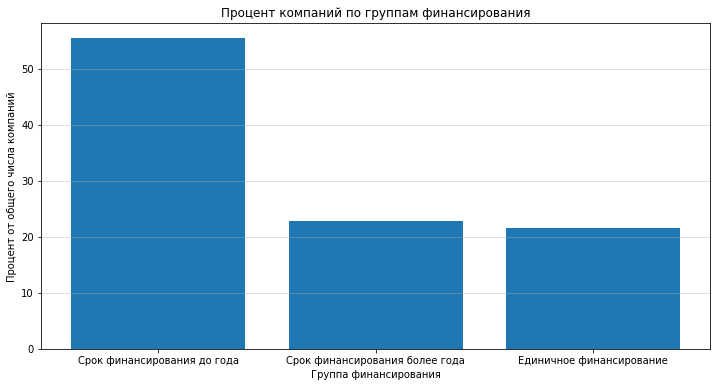

In [26]:
# Подсчитываем количество компаний в каждой группе
group_counts = cb_investments['funding_group'].value_counts()

# Вычисляем проценты
percentages = group_counts / len(cb_investments) * 100

# Строим график
plt.figure(figsize=(12, 6))
plt.bar(percentages.index, percentages.values)
plt.title('Процент компаний по группам финансирования')
plt.xlabel('Группа финансирования')
plt.ylabel('Процент от общего числа компаний')
plt.grid(axis='y', alpha=0.5)

plt.show()


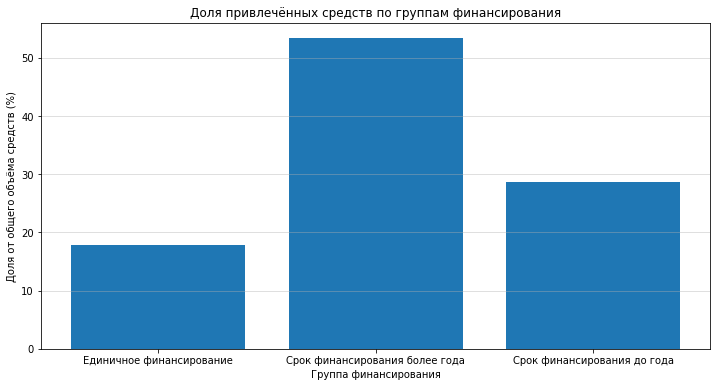

In [27]:
# Подсчитываем общий объём привлечённых средств для каждой группы
group_totals = cb_investments.groupby('funding_group')['funding_total_usd'].sum()

# Вычисляем доли от общего объёма
total_funding = group_totals.sum()
shares = group_totals / total_funding * 100

# Строим график
plt.figure(figsize=(12, 6))
plt.bar(shares.index, shares.values)
plt.title('Доля привлечённых средств по группам финансирования')
plt.xlabel('Группа финансирования')
plt.ylabel('Доля от общего объёма средств (%)')
plt.grid(axis='y', alpha=0.5)

plt.show()


Срок финансирования большего числа компаний приходится на период до года. Наименьшая доля компаний была профинансирована единично, чуть чаще компании финансируются более года. Одновременно с этим, наиболее обильно финансируются компании, чей срок финансирования превышает год, что легко объяснимо, так как за больший промежуток времени инвесторы успевают вложить большие суммы. 

### 2.2 Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.

Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.

Частота встречаемости сегментов:
 Software                 4716
Biotechnology            3491
Mobile                   2299
E-Commerce               1795
Curated Web              1669
                         ... 
Interior Design             1
Navigation                  1
Computer Vision             1
Medical Professionals       1
Women                       1
Name: market, Length: 393, dtype: int64

Классификация сегментов:
             Market_Segment  Company_Count                Category
0                 Software           4716  Массовый (Mass Market)
1            Biotechnology           3491  Массовый (Mass Market)
2                   Mobile           2299  Массовый (Mass Market)
3               E-Commerce           1795  Массовый (Mass Market)
4              Curated Web           1669  Массовый (Mass Market)
..                     ...            ...                     ...
388        Interior Design              1  Нишевый (Niche Market)
389             Navigation              1

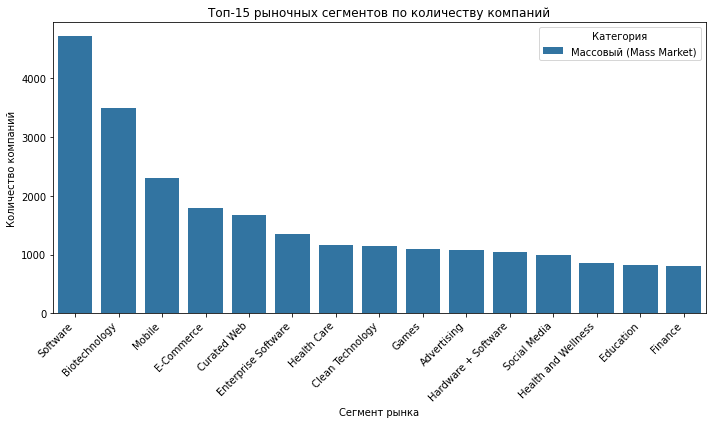

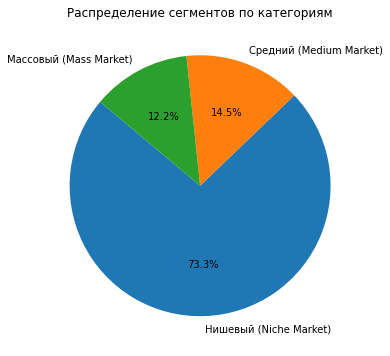

In [28]:
# Расчёт частоты встречаемости каждого сегмента рынка
segment_frequency = cb_investments['market'].value_counts().sort_values(ascending=False)
print("Частота встречаемости сегментов:\n", segment_frequency)

# Классификация сегментов по количеству компаний
def classify_segment(count):
    if count > 120:
        return 'Массовый (Mass Market)'
    elif 35 <= count <= 120:
        return 'Средний (Medium Market)'
    else:
        return 'Нишевый (Niche Market)' 

segment_classification = segment_frequency.apply(classify_segment)

# Формирование итоговой таблицы по сегментам
segment_analysis_df = pd.DataFrame({
    'Market_Segment': segment_frequency.index,
    'Company_Count': segment_frequency.values,
    'Category': segment_classification.values
})

print("\nКлассификация сегментов:\n", segment_analysis_df)

# Подсчёт количества сегментов в каждой категории
category_counts = segment_classification.value_counts()
print("\nКоличество сегментов в каждой категории:")
for category, count in category_counts.items():
    print(f"{category}: {count} сегментов")

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.barplot(
    x=segment_analysis_df['Market_Segment'][:15], 
    y=segment_analysis_df['Company_Count'][:15], 
    hue=segment_analysis_df['Category'][:15],
    dodge=False
)
plt.title('Топ-15 рыночных сегментов по количеству компаний')
plt.xlabel('Сегмент рынка')
plt.ylabel('Количество компаний')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория')
plt.tight_layout()
plt.show()

# Круговая диаграмма по категориям
plt.figure(figsize=(6, 6))
plt.pie(
    category_counts.values, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Распределение сегментов по категориям')
plt.show()

Оставьте в столбце `market` только массовые сегменты. Для остальных сегментов замените значения на заглушки — `niche` для нишевых и `mid` для средних.

Дальнейшие исследования выполняйте с учётом этой замены. Индивидуальные сегменты внутри средней и нишевой групп рассматривать не нужно — они объединяются в два общих сегмента.


In [29]:
# Подсчёт количества компаний в каждом сегменте рынка
market_counts = cb_investments['market'].value_counts()

# Функция для классификации сегментов
def classify_market(market):
    count = market_counts[market]
    if count > 120:
        return market  # массовый сегмент
    elif 35 <= count <= 120:
        return 'mid'   # средний сегмент
    else:
        return 'niche' # нишевый сегмент

# Применение функции к столбцу market
cb_investments['market'] = cb_investments['market'].apply(classify_market)


cb_investments

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_rounds_count,funding_duration_days,funding_group
0,Harvard University,http://harvard.edu,|Education|,Education,90000000.0,operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,mid,9000000.0,operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
3,University of Michigan,http://www.umich.edu/,|Education|,Education,7700000.0,operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,347.0,Срок финансирования до года
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,540000.0,operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
6,Tulane University,http://tulane.edu/,|Education|,Education,12000000.0,operating,USA,LA,New Orleans,New Orleans,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,108.0,Срок финансирования до года
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49423,IzumoBase,http://izumobase.com/en/,|Software|,Software,1350000.0,operating,JPN,NaN,Tokyo,Tokyo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
49424,LoudCell Technologies,http://loudcell.com/,|Software|,Software,1000000.0,operating,USA,CA,SF Bay Area,Santa Clara,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
49427,A Crowd of Monsters,http://acrowdofmonsters.com,|Games|,Games,560248.0,operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
49434,SouthGobi Resources,http://southgobi.com,|Mining Technologies|,niche,9000000.0,operating,CAN,BC,Vancouver,Vancouver,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года


Большую часть рынка составляют нишевые компании, что легко объясняется их количеством. При этом разница между долей рынка, занимаемой массовым сегментом и средним сигментом имеет мизерное различие в 0,2%. Это может свидетельствовать о том, что средний сегмент является короткой промежуточной стадией между нишевым и массовым сегментом. Также это может свидетельствовать о том, что компании из среднего сегмента не выдерживают конкуренции с массовым сегментом и откатываются в нишевую категорию.

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.

In [30]:
cb_investments.head()


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_rounds_count,funding_duration_days,funding_group
0,Harvard University,http://harvard.edu,|Education|,Education,90000000.0,operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,mid,9000000.0,operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
3,University of Michigan,http://www.umich.edu/,|Education|,Education,7700000.0,operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,347.0,Срок финансирования до года
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,540000.0,operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
6,Tulane University,http://tulane.edu/,|Education|,Education,12000000.0,operating,USA,LA,New Orleans,New Orleans,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,108.0,Срок финансирования до года


<AxesSubplot:>

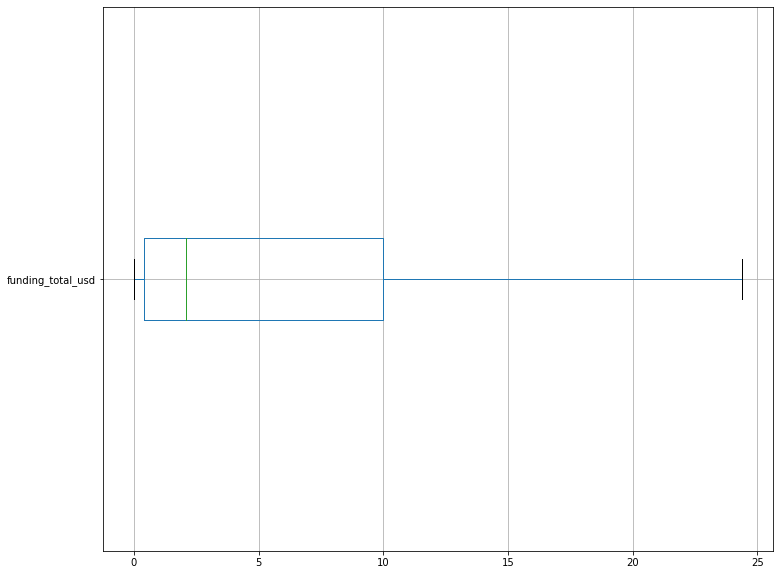

In [32]:
#Разделяем все значения на 1 000 000 в целях грамотного отображения данных
cb_investments['funding_total_usd'] = cb_investments['funding_total_usd'] / 1000000
cb_investments.boxplot(column='funding_total_usd', vert=False, grid=True, figsize=(12,10), showfliers=False)

Судя по всему, выбросами можно считать значения, превышающие 24 500 000 USD.

Определите компании с аномальным объёмом общего финансирования — используйте метод IQR отдельно по каждому сегменту. Напомним, что все нишевые сегменты должны быть объединены в одну группу, а средние — в другую.

Определите сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и выведите топ таких сегментов.

In [33]:
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Применяем функцию для каждого сегмента
outliers_by_segment = pd.Series(False, index=cb_investments.index)
for segment in cb_investments['market'].unique():
    segment_mask = cb_investments['market'] == segment
    outliers_segment = identify_outliers_iqr(cb_investments.loc[segment_mask, 'funding_total_usd'])
    outliers_by_segment.loc[segment_mask] = outliers_segment

# Определяем сегменты рынка с наибольшей долей аномальных компаний
outlier_segments = (cb_investments.loc[outliers_by_segment, 'market'].value_counts() /
                    cb_investments['market'].value_counts() * 100).round(2)
print("Доля компаний с аномальным объёмом финансирования по сегментам рынка")
display(outlier_segments.sort_values(ascending=False))

# Топ-10 сегментов
top_10_segments = outlier_segments.sort_values(ascending=False).head(10)


Доля компаний с аномальным объёмом финансирования по сегментам рынка


Real Estate             17.45
Entertainment           16.78
SaaS                    16.60
Consulting              16.57
Search                  16.32
Video                   16.22
Technology              16.10
niche                   15.87
Cloud Computing         15.86
Photography             15.76
Networking              15.60
Travel                  15.36
Big Data                15.17
Internet                15.06
Marketplaces            14.95
Apps                    14.68
E-Commerce              14.65
mid                     14.44
Automotive              14.38
Medical                 14.00
Sports                  13.79
Social Media            13.72
Fashion                 13.58
News                    13.42
Education               13.39
Hospitality             13.19
Health and Wellness     13.14
Mobile                  13.05
Startups                12.98
Clean Technology        12.87
Messaging               12.67
Music                   12.45
Social Network Media    12.42
Advertisin

In [34]:
print("Топ-10 сегментов с наибольшей долей аномальных компаний:")
print(top_10_segments)

Топ-10 сегментов с наибольшей долей аномальных компаний:
Real Estate        17.45
Entertainment      16.78
SaaS               16.60
Consulting         16.57
Search             16.32
Video              16.22
Technology         16.10
niche              15.87
Cloud Computing    15.86
Photography        15.76
Name: market, dtype: float64


Комментарий студента V1: произведена корректировка построения сводной таблицы.

### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

Проверьте по датасету, можно ли считать, что вам предоставили полные данные за 2014 год. Затем исключите из датасета компании, которые вы ранее посчитали получившими аномальное финансирование.

Когда исключите аномальные записи, на основе столбцов `mid_funding_at` и `funding_rounds` оставьте в датасете данные только об определённых компаниях. Они должны были получать финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

In [35]:
yearly_count = cb_investments.groupby('founded_year').size().reset_index(name='count')
print(yearly_count)
average_count = yearly_count['count'].mean()
print("Среднее количество строк:", average_count)


     founded_year  count
0          1636.0      1
1          1802.0      1
2          1817.0      1
3          1826.0      1
4          1834.0      1
..            ...    ...
130        2010.0   3001
131        2011.0   3815
132        2012.0   3933
133        2013.0   2926
134        2014.0    892

[135 rows x 2 columns]
Среднее количество строк: 225.22962962962964


Видимо, что информации по 2014-му году заметно меньше, чем по предыдущим годам, начиная с 2010-го.

In [36]:
year_filtered_df = cb_investments[cb_investments['founded_year'] == 2014]
year_filtered_df

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_rounds_count,funding_duration_days,funding_group
37085,eBusinessCards.com,http://store.ebusinesscards.com/,|Small and Medium Businesses|Printing|,niche,0.015000,operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
37086,Handmade Mobile,http://handmademobile.com,|Social Media|,Social Media,15.391438,operating,USA,CA,Los Angeles,Santa Monica,...,3973319.0,9000000.0,0.0,0.0,0.0,0.0,0.0,2,1487.0,Срок финансирования более года
37087,AwarenessHub,http://www.awarenesshub.com,|Software|,Software,21.948190,operating,USA,MA,Boston,Boston,...,9948190.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1803.0,Срок финансирования более года
37088,Athlete Network,http://athletenetwork.com,|Brand Marketing|Internet|,mid,1.300000,operating,USA,KS,Kansas City,Kansas City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1121.0,Срок финансирования более года
37089,The New York Times,http://www.nytimes.com,|News|,News,250.000000,operating,USA,NY,New York City,New York,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38547,fone.do,http://fone.do,|Telecommunications|,mid,0.500000,operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
38549,Kandid,http://kandid.co,|Apps|,Apps,1.400000,operating,USA,CA,SF Bay Area,San Francisco,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
38551,Manifatto,http://manifatto.com,|E-Commerce|,E-Commerce,0.030000,operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года
38552,Le Herbé,https://leherbe.com,|Medical Marijuana Patients|Organic Food|Produ...,niche,0.100000,operating,USA,WA,Seattle,Seattle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Срок финансирования до года


In [37]:
# Сгруппируем данные по кварталам и посчитаем сумму финансирования
quarterly_dynamics = year_filtered_df.groupby('founded_quarter')['funding_total_usd'].sum()

print("Динамика по кварталам за 2014 год:")
print(quarterly_dynamics)



Динамика по кварталам за 2014 год:
founded_quarter
2014-Q1    1380.078725
2014-Q2     161.544847
2014-Q3      54.559510
2014-Q4      20.334270
Name: funding_total_usd, dtype: float64


Видимо, информация о последних трех кварталах 2014-го года неполная. Это необходимо будет учесть в дальнейшем анализе и при интерпритации информации с построенных далее графиков.

In [38]:
# Исключаем аномальные значения
filtered_cb_investments = cb_investments[~outliers_by_segment]




In [39]:
#Оставляем в столбце 'mid_funding_at' только информацию о годе для грамотной группировки
filtered_cb_investments['mid_funding_at'] = filtered_cb_investments['mid_funding_at'].dt.year
# Группируем данные по годам и суммируем funding_rounds
rounds_sum_by_year = filtered_cb_investments.groupby('mid_funding_at')['funding_rounds'].sum().reset_index()

# Выбираем года, в которые сумма funding_rounds превышает 50
years_with_50_or_more_rounds = rounds_sum_by_year[rounds_sum_by_year['funding_rounds'] > 50]

print("Годы с суммой funding_rounds более 50:")
print(years_with_50_or_more_rounds)


Годы с суммой funding_rounds более 50:
    mid_funding_at  funding_rounds
14          2000.0            71.0
15          2001.0            58.0
16          2002.0            52.0
17          2003.0            86.0
18          2004.0           167.0
19          2005.0           824.0
20          2006.0          1462.0
21          2007.0          2034.0
22          2008.0          2792.0
23          2009.0          3806.0
24          2010.0          5677.0
25          2011.0          7787.0
26          2012.0         10167.0
27          2013.0         12058.0
28          2014.0          7315.0


/tmp/ipykernel_48/2814689723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cb_investments['mid_funding_at'] = filtered_cb_investments['mid_funding_at'].dt.year


### 3.3. Анализ типов финансирования по объёму и популярности

Постройте график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. Ориентируйтесь на значения в столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`.

Также постройте график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.

Сравните графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.

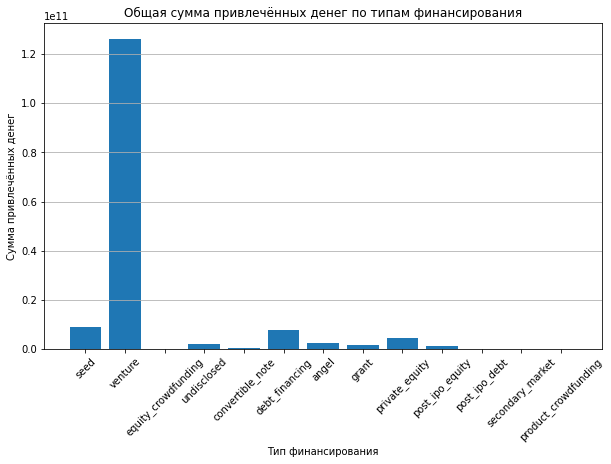

In [40]:
# Подсчитываем общую сумму для каждого типа финансирования
total_funding = filtered_cb_investments[['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
                               'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                               'post_ipo_debt', 'secondary_market', 'product_crowdfunding']].sum()

# Создаём график
plt.figure(figsize=(10, 6))
plt.bar(total_funding.index, total_funding.values)
plt.title('Общая сумма привлечённых денег по типам финансирования')
plt.xlabel('Тип финансирования')
plt.ylabel('Сумма привлечённых денег')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


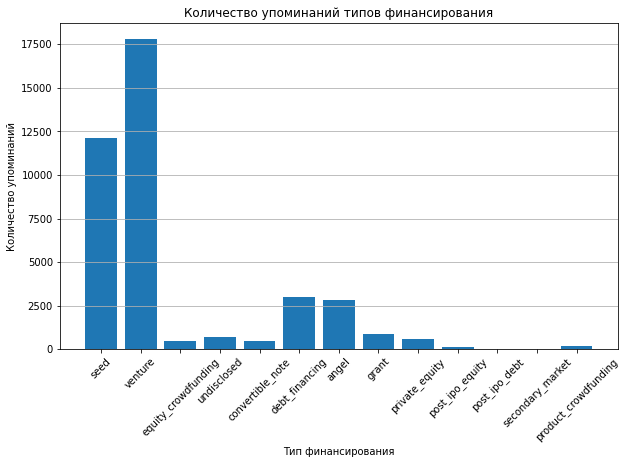

In [41]:
# Подсчитываем количество ненулевых значений для каждого типа финансирования
count_funding = filtered_cb_investments[['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
                               'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                               'post_ipo_debt', 'secondary_market', 'product_crowdfunding']].apply(lambda x: (x > 0).sum())

# Создаём график
plt.figure(figsize=(10, 6))
plt.bar(count_funding.index, count_funding.values)
plt.title('Количество упоминаний типов финансирования')
plt.xlabel('Тип финансирования')
plt.ylabel('Количество упоминаний')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Постройте график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета.

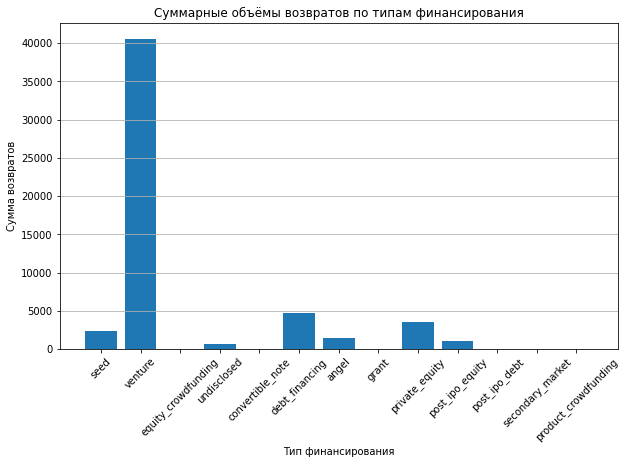

In [42]:
# Подсчитываем общую сумму возвратов для каждого типа финансирования
total_returns = cb_returns[['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 
                            'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
                            'post_ipo_debt', 'secondary_market', 'product_crowdfunding']].sum()

# Создаём график
plt.figure(figsize=(10, 6))
plt.bar(total_returns.index, total_returns.values)
plt.title('Суммарные объёмы возвратов по типам финансирования')
plt.xlabel('Тип финансирования')
plt.ylabel('Сумма возвратов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Наибольшая сумма привлеченным денег с большим отрывом характеризуется типом финансирования "venture". 
Помимо этого примерно в равной степени выделяются такие типы финансирования, как "convertible note" и "private equity".

При этом чаще всего компании финансируются методом "venture", с относительно небольшим отрывом от "seed".

Также тип финансирования "venture" с огромным отрывом опережает другие типы по объему возвратов.

Из этого всего можно сделать вывод, что венчурное долгосрочное финансирование, не смотря на свою рискованность, является наиболее распространенным, надежным и доходным типом финансирования.

## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

Используя столбцы `funding_total_usd` и `funding_rounds`, рассчитайте для каждой компании средний объём одного раунда финансирования.

На основе получившейся таблицы постройте графики, отражающие:
* динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;

* динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).

Когда будете строить графики в этом задании и следующих, используйте данные только по тем компаниям, которые остались в датасете после предыдущих фильтраций.

На основе полученных данных ответьте на вопросы:
* В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?

* Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

In [43]:
filtered_cb_investments = filtered_cb_investments[filtered_cb_investments['mid_funding_at'] >= 2000]
# Рассчитываем средний объём финансирования на раунд
filtered_cb_investments['average_round_size'] = filtered_cb_investments['funding_total_usd'] / filtered_cb_investments['funding_rounds']




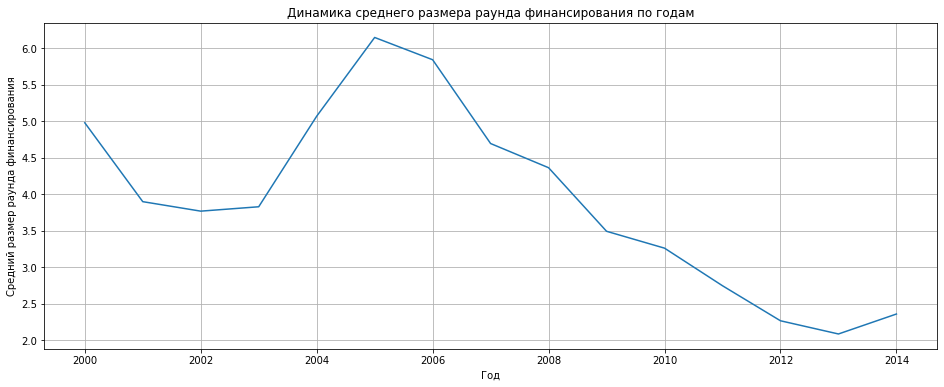

In [44]:
# Группируем данные по годам и рассчитываем средний размер раунда
average_round_size_by_year = filtered_cb_investments.groupby('mid_funding_at')['average_round_size'].mean().reset_index()
#mid_funding_at
# Создаём график
plt.figure(figsize=(16, 6))
plt.plot(average_round_size_by_year['mid_funding_at'], average_round_size_by_year['average_round_size'])
plt.title('Динамика среднего размера раунда финансирования по годам')
plt.xlabel('Год')
plt.ylabel('Средний размер раунда финансирования')
plt.grid()
plt.show()


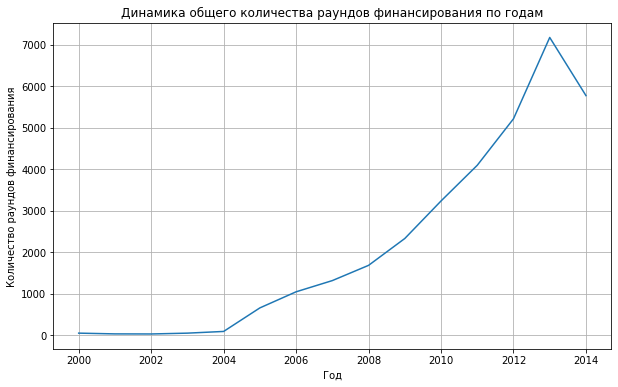

In [45]:
# Группируем данные по годам и подсчитываем количество раундов
rounds_count_by_year = filtered_cb_investments.groupby('mid_funding_at').size().reset_index(name='rounds_count')

# Создаём график
plt.figure(figsize=(10, 6))
plt.plot(rounds_count_by_year['mid_funding_at'], rounds_count_by_year['rounds_count'])
plt.title('Динамика общего количества раундов финансирования по годам')
plt.xlabel('Год')
plt.ylabel('Количество раундов финансирования')
plt.grid()
plt.show()


Начиная с 2000-го года наблюдается тенденция снижения среднего размера средств, собранных в рамках одного раунда, и одновременно с этим довольно резкий относительно равномерный рост динамики количества раундов финансирования, что кажется вполне логичным: больше раундов финансирования - меньший средний размер одного раунда финансирования.  

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.

На графике отразите, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассматривайте только массовые сегменты, а средние и нишевые исключите.

На основе графика сделайте вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.

In [46]:
# Фильтруем данные, исключая строки с 'Niche' и 'Mid' в столбце 'market'
filtered_cb_investments = filtered_cb_investments[~filtered_cb_investments['market'].isin(['niche', 'mid'])]

filtered_cb_investments['mid_funding_at'] = filtered_cb_investments['mid_funding_at'].astype(int)

# Создаём сводную таблицу
summary_table = filtered_cb_investments.pivot_table(values='funding_total_usd', index='mid_funding_at', columns='market', aggfunc='sum')



#founded_year
#mid_funding_at

summary_table




market,Advertising,Analytics,Apps,Automotive,Big Data,Biotechnology,Clean Technology,Cloud Computing,Consulting,Curated Web,...,Semiconductors,Social Media,Social Network Media,Software,Sports,Startups,Technology,Travel,Video,Web Hosting
mid_funding_at,,,,,,,,,,,,,,,,,,,,,
2000,8.250000,1.200000,NaN,NaN,NaN,NaN,NaN,11.500000,4.500000,1.000000,...,NaN,NaN,NaN,31.732640,NaN,NaN,NaN,0.050230,NaN,44.655000
2001,14.998321,10.774916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.650000,...,NaN,0.650000,NaN,27.448852,NaN,NaN,22.160000,NaN,NaN,15.000000
2002,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,59.310000,0.200000,NaN,8.500000,NaN,NaN,NaN
2003,17.350000,NaN,NaN,4.530000,NaN,25.262631,NaN,NaN,NaN,0.250000,...,18.000000,0.005000,NaN,65.683298,NaN,NaN,2.500000,NaN,2.000000,NaN
2004,16.500000,3.000000,NaN,NaN,NaN,122.766544,NaN,NaN,NaN,24.105000,...,61.863398,NaN,NaN,83.740124,NaN,NaN,1.750000,10.230000,14.704000,80.988090
2005,78.700000,82.211000,NaN,NaN,NaN,400.129486,21.595000,4.900000,44.862000,42.550000,...,502.222615,14.780000,3.845100,1037.107700,1.882200,NaN,42.476000,27.830000,5.000000,534.168981
2006,140.861933,90.049490,NaN,11.460000,NaN,908.269603,203.280602,16.035455,23.965548,119.310795,...,1367.642016,52.469980,4.800000,1727.229507,7.000000,NaN,28.177425,3.600000,24.971772,725.285220
2007,396.723978,59.474544,1.310600,22.600000,4.100000,1065.529396,531.633599,0.854343,69.992060,222.497292,...,1066.697050,82.297192,20.643200,1301.242630,8.943179,NaN,124.856209,21.450000,28.595391,320.548646
2008,479.835391,170.945939,3.050000,52.583430,1.150000,1077.232699,2085.767148,52.891354,30.061080,311.393230,...,1085.538023,75.816547,7.430360,1033.011728,13.325000,4.110387,230.770502,36.490631,85.495000,719.568794


In [47]:
# Выбираем данные за 2013 и 2014 годы
data_2013 = summary_table.loc[2013]
data_2014 = summary_table.loc[2014]

# Сравниваем значения и отбираем сегменты с ростом финансирования
growing_segments = data_2014[data_2014 > data_2013].dropna()

print("Сегменты с ростом размера суммарного финансирования в 2014 году по сравнению с 2013:")
print(growing_segments)



Сегменты с ростом размера суммарного финансирования в 2014 году по сравнению с 2013:
market
Apps              67.037730
Design            69.060816
Entertainment     74.708184
Internet         113.450756
Manufacturing    448.193754
Marketplaces      41.217341
Medical          176.350145
Photography       65.697850
Real Estate      121.464544
SaaS             102.822752
Startups          42.853837
Technology       246.187120
Name: 2014, dtype: float64


In [48]:
# Выбираем нужные столбцы
filtered_summary_table = summary_table.loc[:, ['Apps', 'Design', 'Entertainment', 'Internet', 'Manufacturing', 'Marketplaces', 
                                               'Medical', 'Photography', 'Real Estate', 'SaaS', 'Startups', 'Technology']]
         
         
filtered_summary_table


market,Apps,Design,Entertainment,Internet,Manufacturing,Marketplaces,Medical,Photography,Real Estate,SaaS,Startups,Technology
mid_funding_at,,,,,,,,,,,,
2000,NaN,NaN,0.100000,10.000000,56.659310,NaN,24.000000,NaN,2.500000,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,2.368582,0.105000,NaN,NaN,NaN,NaN,NaN,22.160000
2002,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,5.275000,NaN,NaN,8.500000
2003,NaN,NaN,NaN,NaN,4.269608,NaN,NaN,NaN,6.292200,NaN,NaN,2.500000
2004,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,7.100000,NaN,NaN,NaN,1.750000
2005,NaN,9.300000,27.450000,12.275000,50.660000,NaN,11.090000,2.000000,0.250000,7.240000,NaN,42.476000
2006,NaN,0.707000,1.800000,0.005000,90.379529,NaN,20.250000,11.686406,2.080000,4.069241,NaN,28.177425
2007,1.310600,10.800000,15.524025,0.540000,153.190008,NaN,2.100000,10.764586,33.220000,4.957000,NaN,124.856209
2008,3.050000,0.344302,20.650000,26.388343,123.868732,3.885720,28.812744,23.659381,33.468473,15.200068,4.110387,230.770502


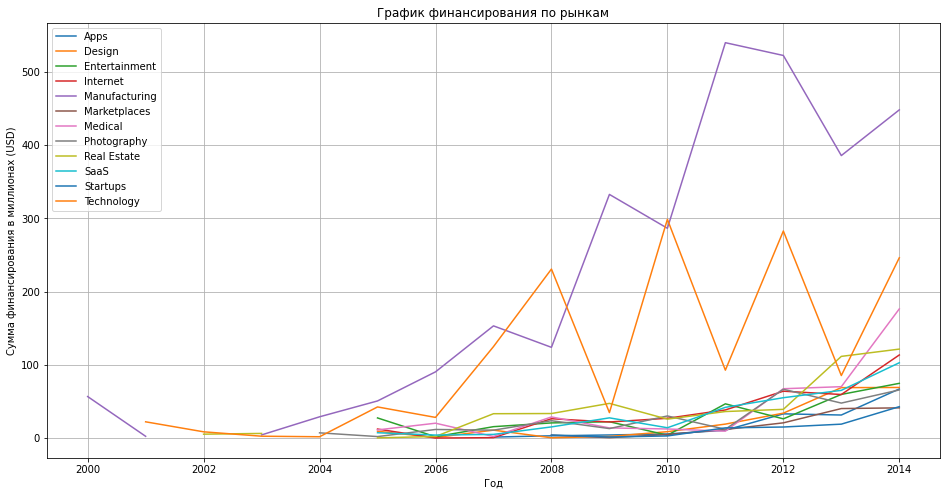

In [49]:
import matplotlib.pyplot as plt

# Строим график
plt.figure(figsize=(16, 8))
for column in filtered_summary_table.columns:
    plt.plot(filtered_summary_table[column], label=column)

plt.title("График финансирования по рынкам")
plt.xlabel("Год")
plt.ylabel("Сумма финансирования в миллионах (USD)")
plt.legend()
plt.grid(True)
plt.show()


Учитывая неполноценность объема данных за последние три квартала 2014-го года, можно констатировать весьмя быстрый и уверенный рост в таких сегментах, как "Education", "Manufacturing" и "Medical".

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

Заказчик хочет знать, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. Ваша цель — для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.



In [50]:
# Сгруппируем данные по году
grouped_data = filtered_cb_investments.groupby('mid_funding_at').sum()

# Выбираем нужные столбцы
relevant_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

# Создаём новый датасет с суммами
summary_data = grouped_data[relevant_columns]

summary_data.index = summary_data.index.astype(int)

summary_data[relevant_columns] = summary_data[relevant_columns] / 1000000

summary_data = summary_data.replace(0, 1)

summary_data


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
mid_funding_at,,,,,,,,,,,,,
2000,10.224140,162.461525,1.000000,76.532640,1.000000,4.000000,23.110000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000
2001,8.508268,123.814864,1.000000,24.335115,1.000000,2.000000,1.053972,0.393114,3.000000,1.000000,1.00,1.000000,1.000000
2002,6.940192,125.288299,1.000000,22.400000,1.000000,1.000000,1.000000,1.000000,7.500000,0.300000,1.00,1.000000,1.000000
2003,3.694041,257.585625,1.000000,14.849186,1.000000,4.350000,6.600000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000
2004,14.264728,657.995137,1.000000,58.565215,6.765834,25.500000,4.603102,1.000000,12.000000,1.000000,1.00,1.000000,1.000000
2005,19.185372,4637.586702,1.000000,1.000000,1.000000,30.133622,31.158800,10.742481,1.000000,1.000000,1.00,1.000000,1.000000
2006,43.487748,7996.038826,1.000000,18.259108,1.000000,71.919460,41.331836,0.250000,2.300000,3.467747,1.00,7.718867,1.000000
2007,132.626305,8709.702900,1.000000,66.349948,5.917734,124.360728,136.016275,41.872245,70.000000,1.000000,1.00,1.000000,1.000000
2008,203.885334,10666.086421,1.000000,57.827493,7.047669,318.359468,210.666120,13.591974,144.448891,1.000000,1.00,1.000000,1.000000


In [51]:
#Рассчитываем соотношение возвратов
columns_to_divide = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding']



# Выполняем деление
result_data = cb_returns[columns_to_divide] / summary_data[columns_to_divide]




result_data


,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,1.633389,0.341004,0.000000,1.021917,0.000000,2.165000,0.278235,0.0,0.000000,0.940000,0.000000,0.200000,0.000000
2001,0.338494,0.189719,0.000000,0.883497,0.010000,2.245000,1.119574,0.0,0.000000,0.460000,0.000000,0.460000,0.000000
2002,0.949541,1.671505,0.000000,1.150446,0.020000,3.420000,3.410000,0.0,0.201333,1.133333,0.000000,0.060000,0.000000
2003,2.095266,0.907892,0.000000,0.633031,0.010000,0.250575,0.516667,0.0,1.620000,2.110000,0.000000,0.080000,0.000000
2004,0.696123,0.844839,0.000000,0.566719,0.001478,0.531373,1.994307,0.0,0.182500,3.380000,0.000000,0.550000,0.000000
2005,1.386473,0.566872,0.000000,9.510000,0.020000,1.164480,0.996829,0.0,2.400000,3.510000,0.000000,0.050000,0.000000
2006,1.421320,0.387714,0.190000,2.559818,1.780000,1.574122,1.155284,0.0,7.247826,5.934689,0.000000,0.015546,0.000000
2007,0.530890,0.411652,0.010000,0.834515,0.544127,1.010608,1.209488,0.0,1.268714,24.360000,0.000000,0.570000,0.000000
2008,0.440051,0.254734,0.030000,0.709351,0.242633,1.248714,0.488118,0.0,0.902603,84.280000,0.000000,0.470000,0.000000


Постройте график, на котором отобразите нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

Сделайте вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

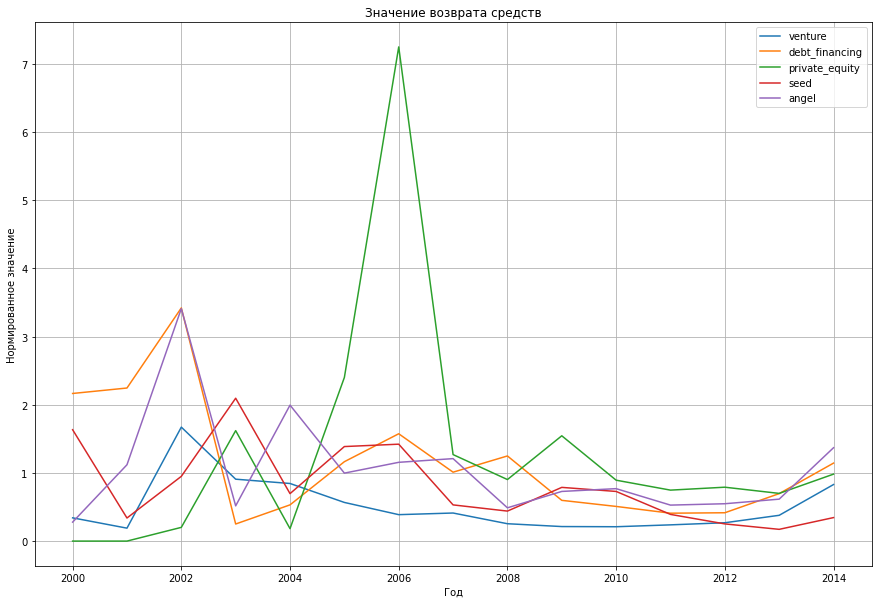

In [52]:
# Выбираем нужные столбцы
columns_to_plot = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']


normalized_data = result_data[columns_to_plot]

# Строим график
plt.figure(figsize=(15, 10))
for column in columns_to_plot:
    plt.plot(normalized_data[column], label=column)

plt.title("Значение возврата средств")
plt.xlabel("Год")
plt.ylabel("Нормированное значение")
plt.legend()
plt.grid(True)
plt.show()



## Шаг 5. Итоговый вывод и рекомендации

Представьте, что на календаре 2015 год. Опираясь на результаты анализа, дайте рекомендацию заказчику:

* в какую отрасль стоит инвестировать;
* какой тип финансирования при этом будет наиболее уместным.

Подведите итоги проекта:
* опишите, какие шаги были выполнены;
* какие выводы удалось сделать;
* насколько выводы согласуются между собой или, наоборот, вызывают сомнения.



Рекомендации:
Суммируя сформулированные по ходу проекта промежуточные выводы, можно порекомендовать инвестировать в такие сферы, как "Education", "Manufacturing" и "Medical", при этом по возможности не пытаться изначально занимать средний сегмент. Наиболее уместным будет долгосрочное венчурное финансирование.

Была проделана работа по предобработке данных, инжирингу признаков, фильтрации и разделения данных на группы, обширный анализ различных признаков и тенденций, а также визуализация и констатация полученных выводов.